## Title - TeleMarketing Analysis

### Importing Libraries

In [3]:
# Importing the Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [5]:
# Importing the dataset
df = pd.read_csv('dataset_X.csv')

In [6]:
# printing the first five rows of dataset
df.head()

,Call_ID,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_code,First_Name,Last_Name,Area_Code,Gender,Call_Count
0,9545434,False,5265,42,147,2,37.0,Jk,Jk,2302,Male,1
1,9211206,False,5226,74,146,2,37.0,Em,Sh,1501,Male,10
2,8873010,False,4452,35,144,2,37.0,BI,MI,1550,Male,9
3,9852034,False,5461,40,149,2,37.0,WT,LI,1401,Male,6
4,9416548,False,5298,26,147,2,37.0,LA,LA,125,Female,12


### Data Cleaning and Preprocessing

In [8]:
# getting the number of rows and columns
df.shape

(100000, 12)

In [9]:
# checking duplicated values in dataset
df.duplicated().sum()

0

In [10]:
# checking null and missing values
df.isnull().sum()

Call_ID          0
Sale            32
Agent_ID      2315
Age              0
Product_ID       0
Timezone         0
Phone_code      28
First_Name     682
Last_Name      681
Area_Code      460
Gender           0
Call_Count       0
dtype: int64

In [11]:
# getting details information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Call_ID     100000 non-null  int64  
 1   Sale        99968 non-null   object 
 2   Agent_ID    97685 non-null   object 
 3   Age         100000 non-null  int64  
 4   Product_ID  100000 non-null  int64  
 5   Timezone    100000 non-null  int64  
 6   Phone_code  99972 non-null   float64
 7   First_Name  99318 non-null   object 
 8   Last_Name   99319 non-null   object 
 9   Area_Code   99540 non-null   object 
 10  Gender      100000 non-null  object 
 11  Call_Count  100000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 9.2+ MB


In [12]:
# dropping un-neccessary columns from dataset
df.drop(['Timezone', 'Phone_code', 'Area_Code'], axis= 1 , inplace=True)

In [13]:
# dropping nell and missing values
df.dropna(inplace= True)

In [14]:
# checking null and missing values
df.isnull().sum()

Call_ID       0
Sale          0
Agent_ID      0
Age           0
Product_ID    0
First_Name    0
Last_Name     0
Gender        0
Call_Count    0
dtype: int64

In [15]:
# getting the shape of dataset
df.shape

(96525, 9)

In [16]:
df.head()

,Call_ID,Sale,Agent_ID,Age,Product_ID,First_Name,Last_Name,Gender,Call_Count
0,9545434,False,5265,42,147,Jk,Jk,Male,1
1,9211206,False,5226,74,146,Em,Sh,Male,10
2,8873010,False,4452,35,144,BI,MI,Male,9
3,9852034,False,5461,40,149,WT,LI,Male,6
4,9416548,False,5298,26,147,LA,LA,Female,12


### Exploratory Data Analysis and Data Visualization

In [18]:
# Count of values from Sale column
df.Sale.value_counts()

Sale
False    88076
True      8449
Name: count, dtype: int64

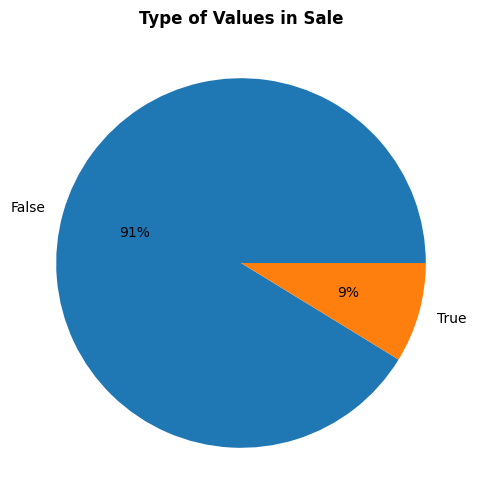

In [19]:
# Pie chart for counting values from Sale column 
plt.figure(figsize=(10,6))
plt.pie(df.Sale.value_counts(), labels=['False', 'True'], autopct='%.0f%%')
plt.title('Type of Values in Sale', fontsize=12, weight='bold')
plt.show()

Note - Only 9% of Telemarketing converted into sales  

In [21]:
# Count of differnt ID's from Product ID column
df.Product_ID.value_counts()

Product_ID
148    15068
146    14985
147    14887
149    14667
145    10357
150     9530
144     5906
151     5686
143     3727
142     1712
Name: count, dtype: int64

In [22]:
# Count of types of Gender from Gender column
df.Gender.value_counts()

Gender
Male      50402
Female    45192
Others      931
Name: count, dtype: int64

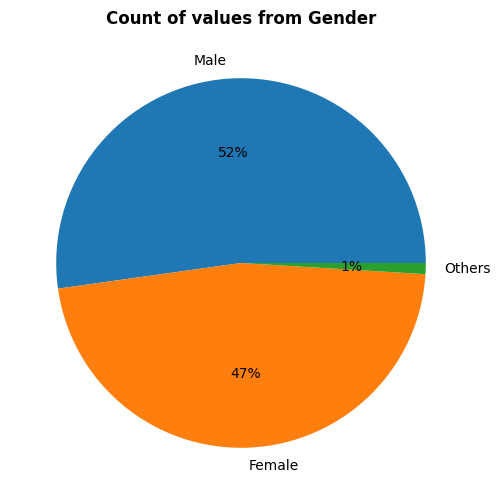

In [23]:
# Pie chart for count of values from Gender column
plt.figure(figsize=(10,6))
plt.pie(df.Gender.value_counts(), labels=['Male', 'Female', 'Others'], autopct='%.0f%%')
plt.title('Count of values from Gender', fontsize=12, weight='bold')
plt.show()

Note - 
* Male forms 52% of total customers
* while female are 47%

In [25]:
# Grouping Gender column with respect to Sale column
df.groupby(['Gender'])['Sale'].value_counts()

Gender  Sale 
Female  False    41473
        True      3719
Male    False    45795
        True      4607
Others  False      808
        True       123
Name: count, dtype: int64

In [26]:
# count of values from call_Count column
df.Call_Count.value_counts()

Call_Count
1     35536
2     19685
3     11789
4      7211
5      4616
9      4165
6      3340
7      3280
8      2661
12     1054
10     1042
15      865
11      748
13      255
14      251
16       15
17        5
19        2
29        1
38        1
21        1
22        1
55        1
Name: count, dtype: int64

**We will segment Call Count column to be easily handled**

In [28]:
bin_edges = [0, 5, 10, 15, 20, 25, 30, 55]
bin_names = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '>30']
df['Call_range'] = pd.cut(df['Call_Count'], bin_edges, labels= bin_names)

In [29]:
# count of Call_range values
df.Call_range.value_counts()

Call_range
1-5      78837
6-10     14488
11-15     3173
16-20       22
21-25        2
>30          2
26-30        1
Name: count, dtype: int64

In [30]:
# grouping Call_range values with respect to Sale
df.groupby('Call_range')['Sale'].value_counts()

Call_range  Sale 
1-5         False    71477
            True      7360
6-10        False    13566
            True       922
11-15       False     3007
            True       166
16-20       False       21
            True         1
21-25       False        2
            True         0
26-30       False        1
            True         0
>30         False        2
            True         0
Name: count, dtype: int64

Note - Call count didn't affect on percentage of sale

In [32]:
# writing query to sale and NoSale column
df_sale = df.query('Sale == True')
df_nosale = df.query('Sale == False')

In [33]:
# getting mean of age with respect Sale and nosale data
df_sale.Age.mean() , df_nosale.Age.mean()

(52.38430583501006, 52.57362959262455)

Note -
* Mean age of sales in the two data is very close to each other,
* Which means that age doesn't affect sales.

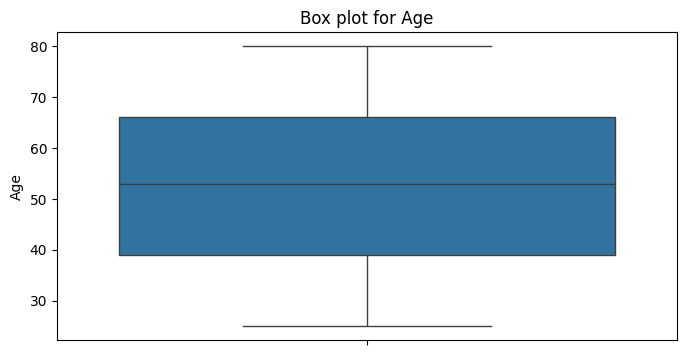

In [35]:
# Box plot for Age column
plt.figure(figsize=(8,4))
sns.boxplot(df['Age'])
plt.title('Box plot for Age')
plt.show()

Note - As we see above the mean age is around 52 years.

In [37]:
# counting values of Product_ID from sale data
df_sale['Product_ID'].value_counts()

Product_ID
148    1616
149    1407
146    1130
145    1130
147    1049
150     922
144     458
151     401
143     219
142     117
Name: count, dtype: int64

In [38]:
# counting values of Product_ID from nosale data
df_nosale['Product_ID'].value_counts()

Product_ID
146    13855
147    13838
148    13452
149    13260
145     9227
150     8608
144     5448
151     5285
143     3508
142     1595
Name: count, dtype: int64

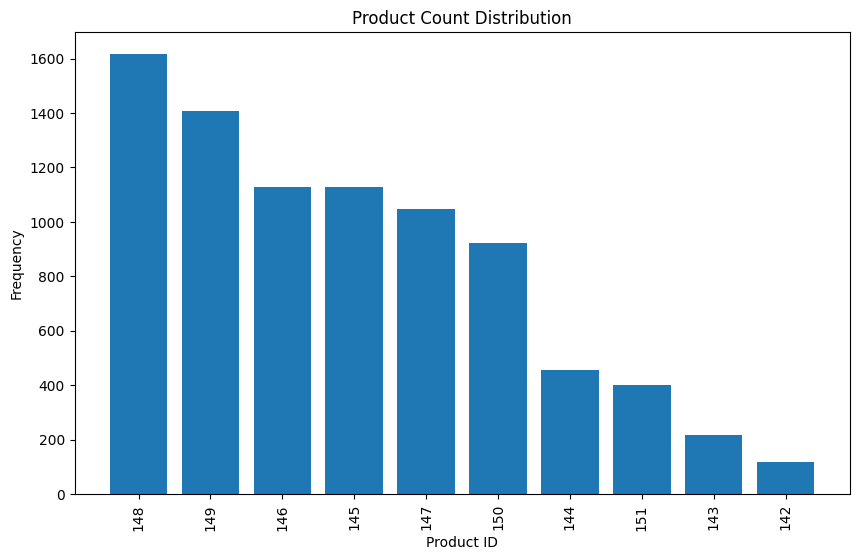

In [39]:
# Count the occurrences of each product ID
product_count = df_sale['Product_ID'].value_counts()

# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(product_count.index.astype(str), product_count.values)
plt.title('Product Count Distribution')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

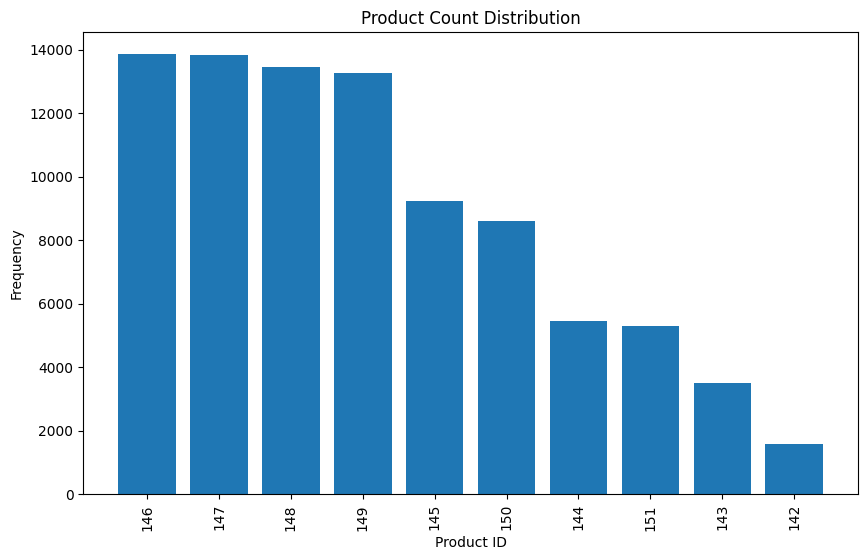

In [40]:
# Count the occurrences of each product ID
product_count = df_nosale['Product_ID'].value_counts()

# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(product_count.index.astype(str), product_count.values)
plt.title('Product Count Distribution')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Note -
* The most two products sold are 148, 149 of product_ID

* And the most two products with false sale are 146, 147 of product_ID

##### **Final Conclusion:**

* Only 9% of telemarketing calls resulted in sales.
* 52% of customers are male, and 47% are female.
* The number of calls did not affect the sales percentage.
* The average age of customers is around 52 years.
* The average age of customers who made a purchase is similar across both datasets, meaning age does not have much impact on sales.
* The two most sold products are product_ID 148 and 149.
* The two products with the highest false sales are product_ID 146 and 147.

##### **Recommendations:**

* The marketing department should rethink the current campaign.
* It would be better to target specific customer segments and tailor the campaign accordingly.
* The dataset is missing useful information, such as the number of sales per customer, which could help in performing a deeper analysis.